In [19]:
# Model Building 

import pandas as pd

dataset = pd.read_csv('Model_Buliding_Dataset.CSV')  # Getting the data from the cleaned dataset csv file

dataset.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_male,gender_unknown,partner_unknown,partner_yes,dependents_unknown,dependents_yes,...,device_protection_unknown,device_protection_yes,tech_support_unknown,tech_support_yes,streaming_tv_unknown,streaming_tv_yes,streaming_movies_unknown,streaming_movies_yes,churn_unknown,churn_yes
0,0,1.313150,-0.020344,-0.335299,True,False,False,True,False,False,...,True,False,True,False,True,False,True,False,False,True
1,1,-0.554296,-0.020344,-0.335299,False,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
2,1,1.169500,-0.020344,-0.335299,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
3,1,0.594901,2.709774,1.120171,False,False,True,False,False,True,...,True,False,True,False,True,False,True,False,False,True
4,1,0.499135,-0.020344,3.247732,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,True


In [20]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = dataset.drop('churn_yes', axis=1)
y = dataset['churn_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression:
[[158  39]
 [ 62  41]]
              precision    recall  f1-score   support

       False       0.72      0.80      0.76       197
        True       0.51      0.40      0.45       103

    accuracy                           0.66       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.65      0.66      0.65       300



In [22]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest:
[[175  22]
 [ 85  18]]
              precision    recall  f1-score   support

       False       0.67      0.89      0.77       197
        True       0.45      0.17      0.25       103

    accuracy                           0.64       300
   macro avg       0.56      0.53      0.51       300
weighted avg       0.60      0.64      0.59       300



In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree:")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree:
[[142  55]
 [ 59  44]]
              precision    recall  f1-score   support

       False       0.71      0.72      0.71       197
        True       0.44      0.43      0.44       103

    accuracy                           0.62       300
   macro avg       0.58      0.57      0.57       300
weighted avg       0.62      0.62      0.62       300



In [24]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("KNN:")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN:
[[157  40]
 [ 81  22]]
              precision    recall  f1-score   support

       False       0.66      0.80      0.72       197
        True       0.35      0.21      0.27       103

    accuracy                           0.60       300
   macro avg       0.51      0.51      0.49       300
weighted avg       0.56      0.60      0.57       300



In [25]:
# From models getting the accuracy scores

from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': y_pred,
    'Random Forest': rf_pred,
    'Decision Tree': dt_pred,
    'KNN': knn_pred
}

for name, preds in models.items():
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")

Logistic Regression: 0.6633
Random Forest: 0.6433
Decision Tree: 0.6200
KNN: 0.5967


In [26]:
# Tuning the models 

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Hyperparameter tuning for Logistic Regression model using GridSearchCV

param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
Best_log_cv = grid_log.best_score_

print("Best Params for Logistic Regression:", grid_log.best_params_)
print("Best CV Score:", Best_log_cv)

Best Params for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.6833333333333333


In [28]:
# Hyperparameter tuning for Random Forest model using GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
Best_rf_cv = grid_rf.best_score_

print("Best Params for Random Forest:", grid_rf.best_params_)
print("Best CV Score:", Best_rf_cv)

Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.6874999999999999


In [29]:
# Hyperparameter tuning for Decision Tree model using GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
Best_dt_cv = grid_dt.best_score_

print("Best Params for Decision Tree:", grid_dt.best_params_)
print("Best CV Score:", Best_dt_cv)

Best Params for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.6758333333333334


In [30]:
# Hyperparameter tuning for Knn model using GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
Best_knn_cv = grid_knn.best_score_

print("Best Params for KNN:", grid_knn.best_params_)
print("Best CV Score:", Best_knn_cv)

Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best CV Score: 0.6858333333333333


In [31]:
# From models getting the Cross validation scores

CV_Score_Dict = {
    'Logistic Regression': Best_log_cv,
    'Random Forest': Best_rf_cv,
    'Decision Tree': Best_dt_cv,
    'KNN': Best_knn_cv 
}
for name, best_cv in CV_Score_Dict.items():
    print(f"{name}: {best_cv}")

Logistic Regression: 0.6833333333333333
Random Forest: 0.6874999999999999
Decision Tree: 0.6758333333333334
KNN: 0.6858333333333333


In [32]:
# By cross-validation score - Random Forest is the best model 

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[176  21]
 [ 84  19]]
              precision    recall  f1-score   support

       False       0.68      0.89      0.77       197
        True       0.47      0.18      0.27       103

    accuracy                           0.65       300
   macro avg       0.58      0.54      0.52       300
weighted avg       0.61      0.65      0.60       300



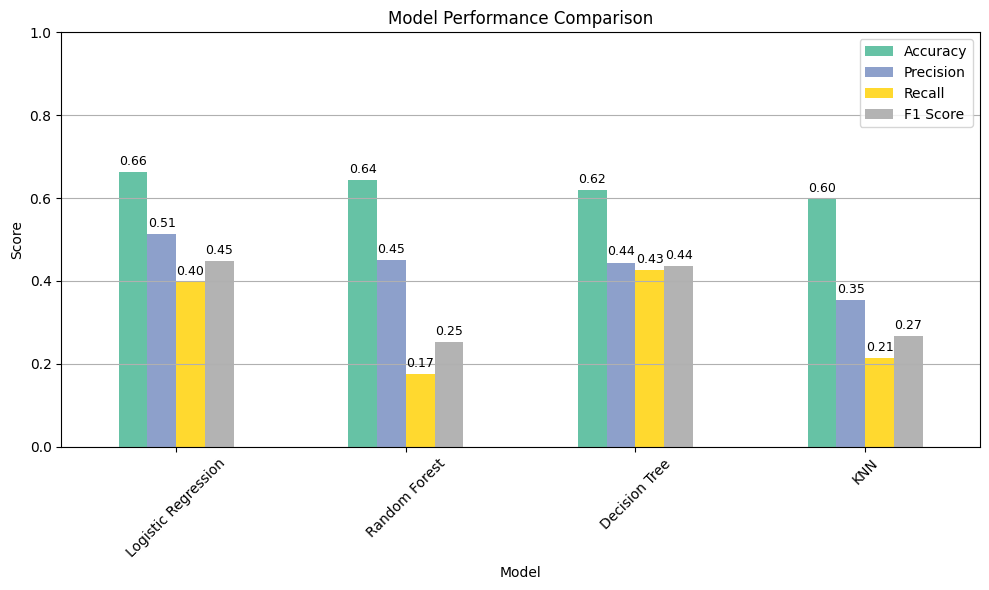

In [33]:
# Model Comparison after tuning

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models and predictions
models = {
    'Logistic Regression': y_pred,
    'Random Forest': rf_pred,
    'Decision Tree': dt_pred,
    'KNN': knn_pred
}

# Initialize metrics dictionary
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Calculate metrics for each model
for name, preds in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, preds))
    metrics['Precision'].append(precision_score(y_test, preds, zero_division=0))
    metrics['Recall'].append(recall_score(y_test, preds, zero_division=0))
    metrics['F1 Score'].append(f1_score(y_test, preds, zero_division=0))

# Create DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Plot the bar chart
ax = metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add score labels on top of each bar
for container in ax.containers:
    for bar in container:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01,
            f"{yval:.2f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()


In [34]:
# Exporting the best model - currently the random forest because of accuracy

import joblib
joblib.dump(best_rf, 'Best_Model.pkl')

['Best_Model.pkl']

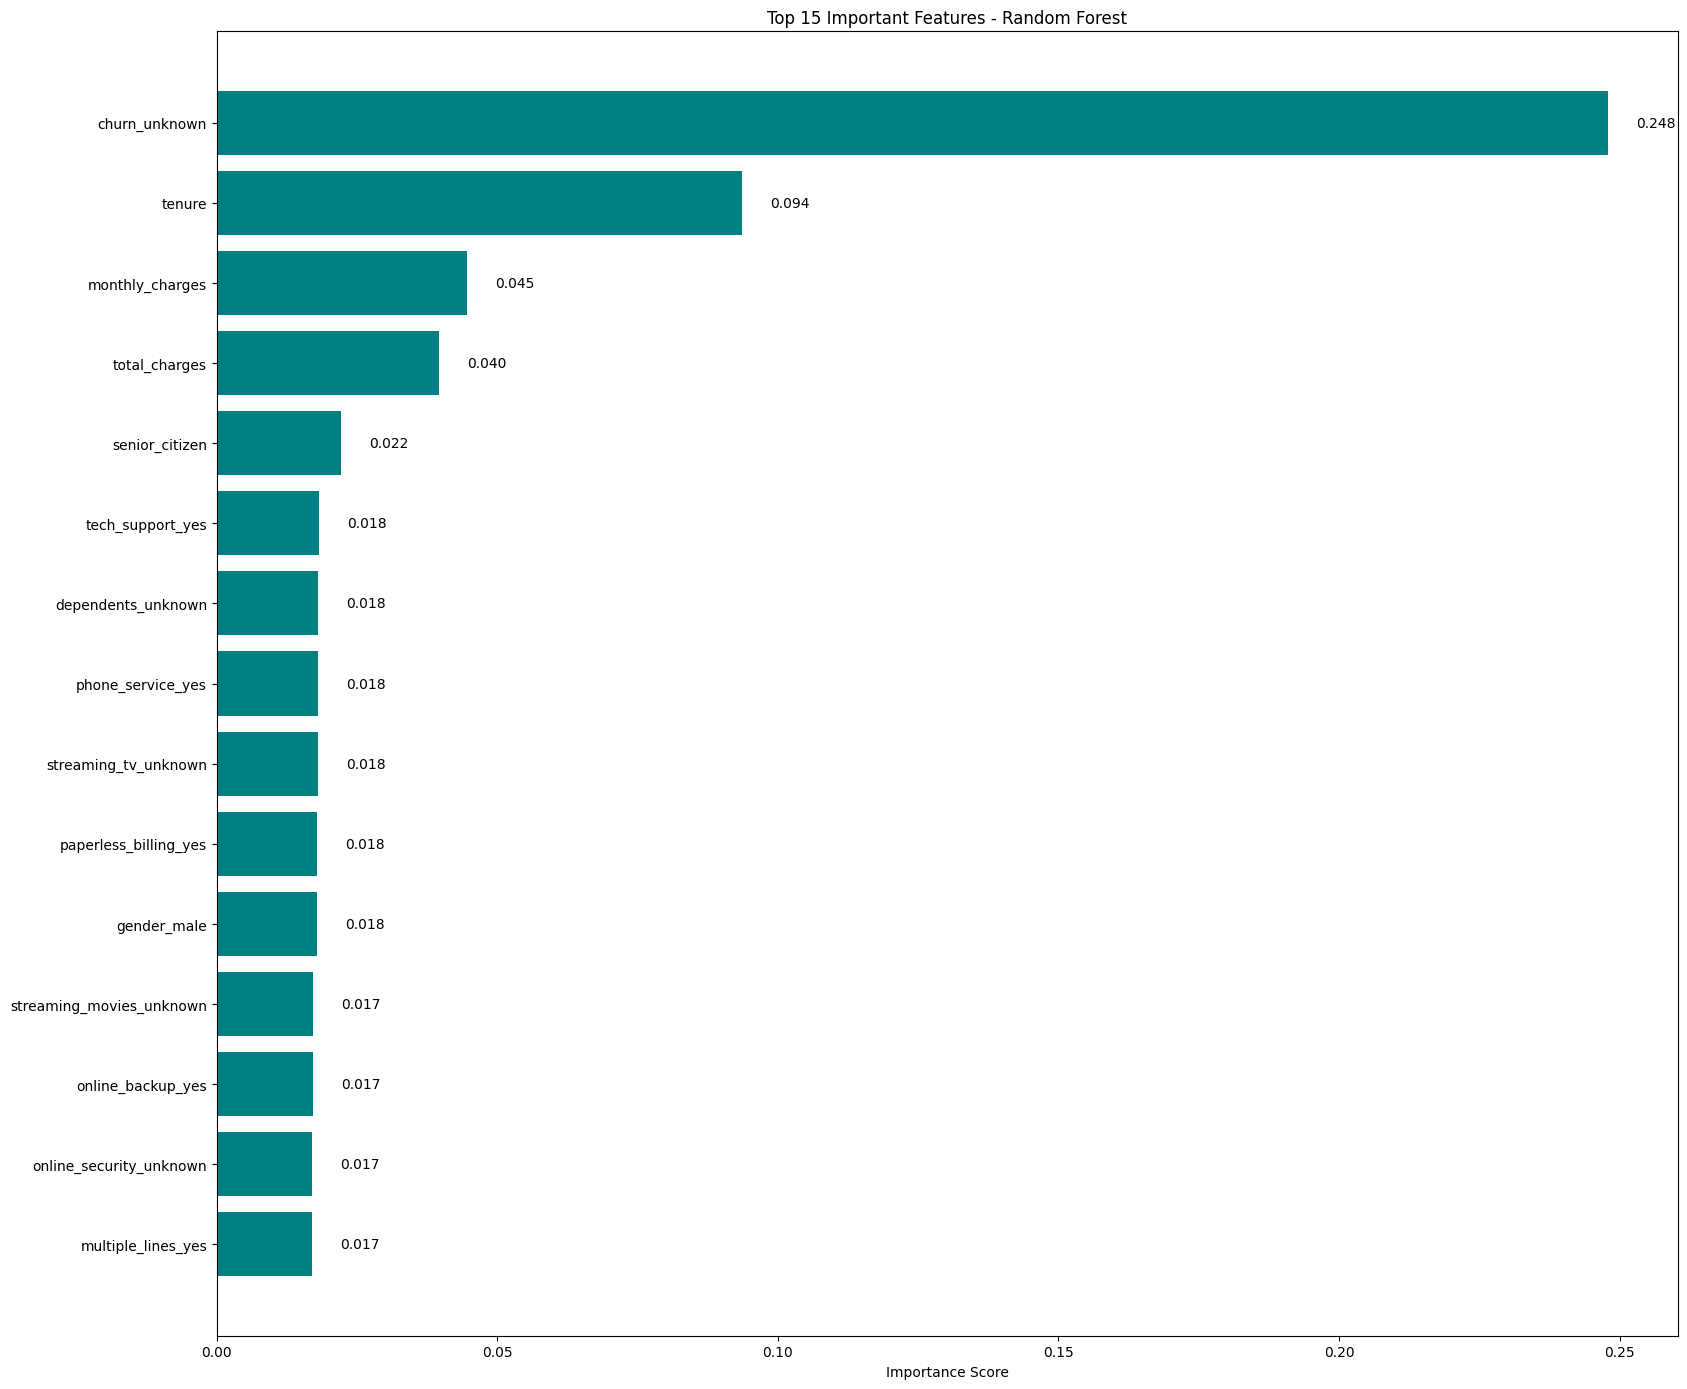

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances and corresponding feature names
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort them
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Take top 15
top_features = sorted_features[:15][::-1]
top_importances = sorted_importances[:15][::-1]

# Plot
plt.figure(figsize=(17, 14))
bars = plt.barh(top_features, top_importances, color='teal')
plt.title('Top 15 Important Features - Random Forest')
plt.xlabel('Importance Score')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

# Create and sort the DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Save to CSV
importance_df.to_csv('Feature_Importance.csv', index=False)